In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel

from bayesopt import optimize_var_ND

In [58]:
def func(x,y):
    assert x.shape == y.shape, "Inputs don't have the same shape"
    return np.cos(x + y)

def grad_func(x,y,noise):
    assert x.shape == y.shape, "Inputs don't have the same shape"
    return np.array([-2*np.sin(2*x + y), -np.sin(2*x + y)]) + noise*np.random.randn(*x.shape)

In [59]:
X1_bounds = np.array([[0.0], [np.pi/2]])
X2_bounds = np.array([[0.0], [np.pi/2]])

noise = 0.1

num_init_points = 4
num_gridpoints = 101

max_iterations = 20
max_std_err = 1e-3

In [60]:
X1_init = np.random.uniform(X1_bounds[0],X1_bounds[1],num_init_points)
X2_init = np.random.uniform(X1_bounds[0],X1_bounds[1],num_init_points)
Y_init = grad_func(X1_init,X2_init,noise).T

In [61]:
X_init = np.vstack(([X1_init],[X2_init])).T

In [62]:
X1_grid = np.linspace(X1_bounds[0],X1_bounds[1],num_gridpoints).reshape(-1)
X2_grid = np.linspace(X2_bounds[0],X2_bounds[1],num_gridpoints).reshape(-1)
grid = np.zeros((len(X1_grid),len(X2_grid),2))
for i,x1 in enumerate(X1_grid):
    for j,x2 in enumerate(X2_grid):
        grid[i,j] = np.array([x1,x2])

In [63]:
kernel = RBF()
# kernel = ConstantKernel(1.0) * Matern(length_scale=1.0, nu=2.5)
gpr = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=50,alpha=noise**2)

In [64]:
means_iter, stds_iter = optimize_var_ND(X_init,Y_init,gpr,grad_func,grid.reshape(-1,2),max_iters=max_iterations,rel_std_noise=max_std_err)

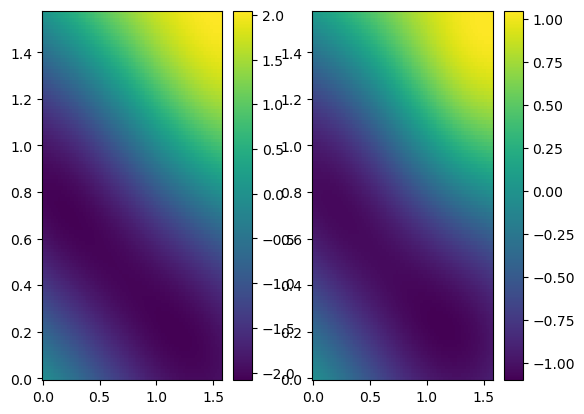

In [65]:
means = np.array(means_iter[-1]).reshape(num_gridpoints,num_gridpoints,2)

f,ax = plt.subplots(1,2)
plt1 = ax[0].pcolormesh(X1_grid,X2_grid,means[:,:,0])
plt2 = ax[1].pcolormesh(X1_grid,X2_grid,means[:,:,1])
plt.colorbar(plt1,ax=ax[0])
plt.colorbar(plt2,ax=ax[1])

## Getting an understanding of how this works in 2D

In [66]:
# gpr.fit(X_init,Y_init[0])

In [67]:
# X1_grid = np.linspace(X1_bounds[0],X1_bounds[1],num_gridpoints).reshape(-1)
# X2_grid = np.linspace(X2_bounds[0],X2_bounds[1],num_gridpoints).reshape(-1)
# grid = np.zeros((len(X1_grid),len(X2_grid),2))
# for i,x1 in enumerate(X1_grid):
#     for j,x2 in enumerate(X2_grid):
#         grid[i,j] = np.array([x1,x2])

In [68]:
# prediction = np.zeros_like(grid)
# for i,elem in enumerate(grid):
#     prediction[i] = np.array(gpr.predict(elem,return_std=True)).T

In [69]:
# plt.pcolormesh(X1_grid,X2_grid,prediction[:,:,0])
# plt.colorbar()

In [70]:
# plt.pcolormesh(X1_grid,X2_grid,prediction[:,:,1])
# plt.colorbar()